In [43]:
from keras import models
from keras import layers

def build_network():
    network = models.Sequential()
    network.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
    network.add(layers.MaxPooling2D(2,2))
    network.add(layers.Conv2D(64, (3,3), activation='relu'))
    network.add(layers.MaxPooling2D(2,2))
    network.add(layers.Conv2D(64, (3,3), activation='relu'))
    network.add(layers.Flatten())
    network.add(layers.Dense(64, activation='relu'))
    network.add(layers.Dense(10, activation='softmax'))

    network.compile(loss='categorical_crossentropy',
                    optimizer='rmsprop',
                    metrics=['accuracy'])
    
    return network

In [44]:
network = build_network()
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                36928     
__________

In [45]:
from keras.datasets import mnist
from keras.utils import to_categorical

def prepare_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    x_train = x_train.reshape((-1, 28, 28, 1))
    x_train = x_train.astype('float32')/255

    x_train = x_train.reshape((-1, 28, 28, 1))
    x_test = x_test.astype('float32')/255
    
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    
    return x_train, y_train, x_test, y_test

In [46]:
x_train, y_train, x_test, y_test = prepare_data()

In [47]:
history = network.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 25s 528us/step - loss: 0.2734 - acc: 0.9144 - val_loss: 0.0822 - val_acc: 0.9765
Epoch 2/10
48000/48000 [==============================] - 22s 464us/step - loss: 0.0634 - acc: 0.9799 - val_loss: 0.0523 - val_acc: 0.9842
Epoch 3/10
48000/48000 [==============================] - 24s 508us/step - loss: 0.0425 - acc: 0.9864 - val_loss: 0.0417 - val_acc: 0.9878
Epoch 4/10
48000/48000 [==============================] - 24s 509us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.0360 - val_acc: 0.9897
Epoch 5/10
48000/48000 [==============================] - 24s 490us/step - loss: 0.0237 - acc: 0.9927 - val_loss: 0.0469 - val_acc: 0.9868
Epoch 6/10
48000/48000 [==============================] - 26s 548us/step - loss: 0.0193 - acc: 0.9939 - val_loss: 0.0389 - val_acc: 0.9897
Epoch 7/10
48000/48000 [==============================] - 26s 536us/step - loss: 0.0149 - acc: 0.9955 - val_loss: 0.

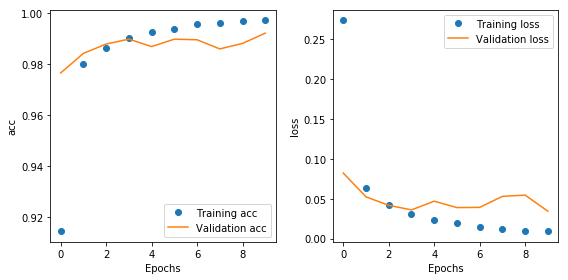

In [48]:
from util import plot_history

plot_history(history)

In [49]:
test_loss, test_acc = network.evaluate(x_test.reshape(-1,28,28,1), y_test)
test_acc

10000/10000 [==============================] - 1s 127us/step


0.992